In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("WaterQuality.csv", delimiter=",")
dataset.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


1. Import Data
2. Remove NaN values
3. Check DataTypes of each Series
4. Checking for correlation
5. (Encoding for categorical data)
6. Build DT Classifier
7. Optimizing Tree

### Things to experiment with:
1. GridSearchCV
2. Decision Trees
3. SVM
4. Pipeline

In [6]:
dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [12]:
print(dataset.isna().sum())
print("Shape of the dataset :",dataset.shape)
# print(dataset.describe())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Shape of the dataset : (3276, 10)


In [55]:
dataset['Potability'].unique()

array([0, 1], dtype=int64)

In [23]:
print(781/3276 * 100, "% of our dataset has at least one NaN value.")
# I will be replacing the missing values with the mean or median for now to get a functional model
# up and running in as little time as possible

# Both mean and median are pretty close so ph is balanced
print(dataset["ph"].mean(), dataset["ph"].median()) 
dataset["ph"].fillna(dataset["ph"].mean(), inplace=True)


23.84004884004884 % of our dataset has at least one NaN value.
7.080794504276835 7.036752103833548


In [33]:
# Both mean and median are pretty close so Sulfate is also balanced
print(dataset["Sulfate"].mean(), dataset["Sulfate"].median()) 
dataset["Sulfate"].fillna(dataset["Sulfate"].mean(), inplace=True)

# Both mean and median are pretty close so Trihalomethanes is also balanced
print(dataset["Trihalomethanes"].mean(), dataset["Trihalomethanes"].median()) 
dataset["Trihalomethanes"].fillna(dataset["Trihalomethanes"].mean(), inplace=True)

333.7757766108134 333.7757766108135
66.39629294676803 66.62248509808484


In [35]:
# Our dataset looks nice now with no missing values and appropriate data types

### Data Visualization and Analysis

<AxesSubplot:>

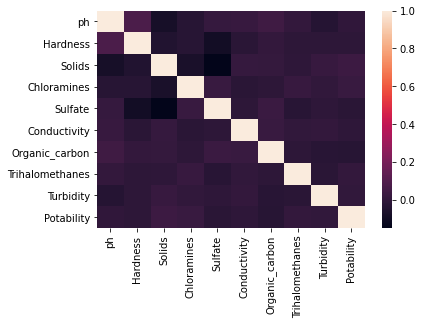

In [40]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix)
# Little to no correlation in the datab

In [46]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [94]:
clf_dt = DecisionTreeClassifier(random_state=42) # Play with max_depth
clf_dt = clf_dt.fit(X_train, y_train)

[Text(93.83600714824063, 213.816, 'X[4] <= 258.97\ngini = 0.477\nsamples = 3013\nvalue = [1828, 1185]'),
 Text(3.602338394760773, 206.56799999999998, 'X[2] <= 21161.408\ngini = 0.39\nsamples = 83\nvalue = [22, 61]'),
 Text(1.9649118516876944, 199.32, 'X[0] <= 7.947\ngini = 0.48\nsamples = 25\nvalue = [15, 10]'),
 Text(1.3099412344584629, 192.072, 'X[4] <= 224.865\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.6549706172292314, 184.824, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(1.9649118516876944, 184.824, 'X[3] <= 4.178\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(1.3099412344584629, 177.576, 'X[7] <= 60.04\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6549706172292314, 170.328, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1.9649118516876944, 170.328, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(2.6198824689169258, 177.576, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(2.6198824689169258, 192.072, 'gini = 0.0\nsamples = 5\nvalue = [0, 5

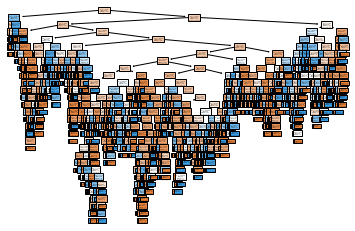

In [95]:
plot_tree(clf_dt, filled=True)

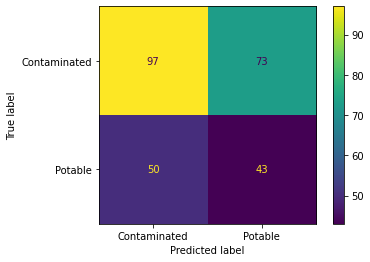

In [96]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Contaminated", "Potable"])

In [97]:
clf_dt.score(X_test, y_test)

0.532319391634981

In [65]:
# Pruning tree helps in countering over fitting
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Values of alpha
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

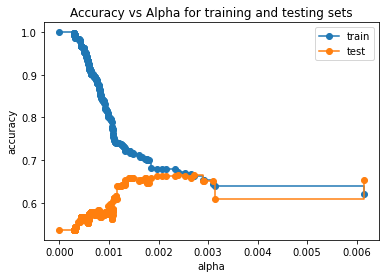

In [67]:
train_score = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_score = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

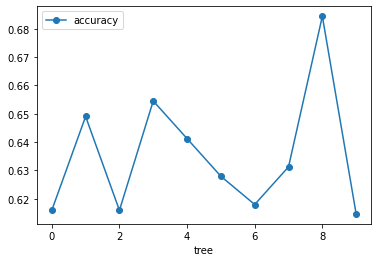

In [69]:
# Cross Validation
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0027)
# We will use 5 fold cross validation for creating 5 different subsets of our data to check for the best values of alpha
cv = 10
scores = cross_val_score(clf_dt, X_train, y_train, cv=cv)
df = pd.DataFrame(data={'tree': range(cv), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='-')

<AxesSubplot:xlabel='alpha'>

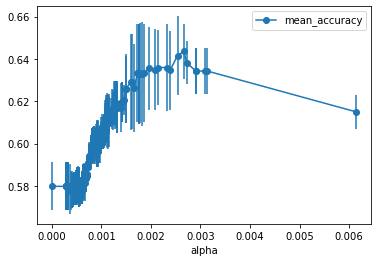

In [73]:
alpha_loop_values = []
cv = 5
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=cv)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std_accuracy'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std_accuracy',
                   marker='o',
                   linestyle='-')

In [76]:
alpha_results[(alpha_results['alpha'] > 0.0025)
             &
              (alpha_results['alpha'] < 0.003)]
# This will filter out all the alphas and their corresponding mean accuracy and std of accuracy between the
# given range and we can hand pick the best one

,alpha,mean_accuracy,std_accuracy
346,0.002537,0.641559,0.018578
347,0.002664,0.643545,0.012972
348,0.002721,0.638238,0.010204
349,0.002906,0.634258,0.010724
350,0.002918,0.634258,0.010724


In [89]:
best_alpha = alpha_results[(alpha_results['alpha'] > 0.0026) & (alpha_results['alpha'] < 0.0027)]['alpha']
best_alpha = float(best_alpha)
best_alpha

0.002664123654166661

In [90]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

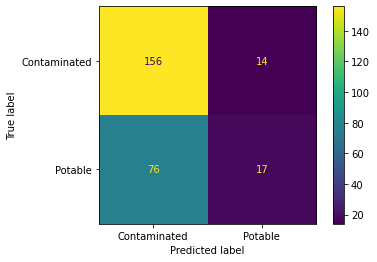

In [91]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Contaminated", "Potable"])

In [92]:
clf_dt_pruned.score(X_test, y_test)

0.6577946768060836

[Text(418.5, 356.73749999999995, 'X[4] <= 258.97\ngini = 0.477\nsamples = 3013\nvalue = [1828, 1185]\nclass = Contaminated'),
 Text(358.7142857142857, 309.1725, 'gini = 0.39\nsamples = 83\nvalue = [22, 61]\nclass = Potable'),
 Text(478.2857142857143, 309.1725, 'X[4] <= 363.505\ngini = 0.473\nsamples = 2930\nvalue = [1806, 1124]\nclass = Contaminated'),
 Text(239.14285714285714, 261.60749999999996, 'X[0] <= 4.595\ngini = 0.462\nsamples = 2408\nvalue = [1534, 874]\nclass = Contaminated'),
 Text(179.35714285714286, 214.0425, 'gini = 0.297\nsamples = 116\nvalue = [95, 21]\nclass = Contaminated'),
 Text(298.92857142857144, 214.0425, 'X[1] <= 162.083\ngini = 0.467\nsamples = 2292\nvalue = [1439, 853]\nclass = Contaminated'),
 Text(119.57142857142857, 166.4775, 'X[0] <= 7.223\ngini = 0.5\nsamples = 262\nvalue = [129, 133]\nclass = Potable'),
 Text(59.785714285714285, 118.91250000000002, 'gini = 0.483\nsamples = 162\nvalue = [96, 66]\nclass = Contaminated'),
 Text(179.35714285714286, 118.91250

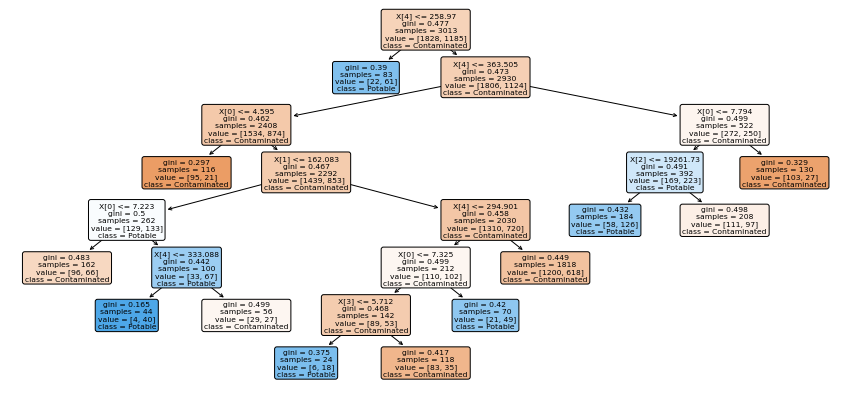

In [99]:
plt.figure(figsize=(15, 7))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=["Contaminated", "Potable"])

In [109]:
clf_svm = SVC(C=1., kernel='rbf')
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\ProgramData\Anaconda3\envs\WineQuality\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6996197718631179

In [111]:
# Even though we have scored higher than the pruned decision tree classifier, we might be overfitting the
# data, so we will use cross validation and GridSearchCV for SVC

parameters = {'kernel': ('rbf'), 'C':[0.1, 1., 10.]}
clf_svm_GS = GridSearchCV(clf_svm, parameters)
clf_svm_GS.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\WineQuality\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\WineQuality\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\WineQuality\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KeyboardInterrupt: 